First we will import the libraries which we required

In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will load the data

In [620]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Analytics Project/Laptop Price Prediction Project/data/laptop_price.csv", encoding='latin-1') # default encoding utf-8
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Exploratory Data Analysis**

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [622]:
df.sample(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
130,133,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,638.99
651,659,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,709.00


First we will understand the data :
1. Laptop ID - ID of the laptops. - It's just the index value hence we will remove the laptop_ID.
2. Company - Companies of the laptops.
3. Product - Name of the products. - Name also not required to worked on.
4. TypeName - Includes the name and type of the product.
5. Inches - Is the size of the screen.
6. ScreenResolution - Resolution of the screen in pixels.
7. cpu - central processing unit
8. RAM- Random Access Memory
9. GPU - type of GPU's
10. OS - operating systems
11. Weight - weight
12. Price - Price is the output column we will predict the type of the laptop.

- Here the output column price having the continuous values hence it is the Regression problem.
- We will apply the Regression Techniques.

In [623]:
df.sample(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
781,790,Asus,Rog G752VS-BA171T,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.3kg,2350.0
946,960,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.2


In [624]:
df.drop(columns=['laptop_ID'], inplace=True) # inplace=True used for the permanant changes.

- Let's check for the null values in the dataset

In [625]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

- As there are no any null values
- now we will also check the duplicated values


In [626]:
df.duplicated().sum()

28

- As there are 28 duplicate values, we need to work on the duplicate values.


In [627]:
df[df.duplicated()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.00
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,379.00
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
1280,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1281,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1282,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1284,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00


- The last few rows have been duplicated hence we will delete the duplicate rows.


In [628]:
df.drop_duplicates(inplace=True, ignore_index=True) # this will remove the duplicate values from the dataset
# ignore_index=True will ensure that the index value is starting from the 1.

**EDA(Exploratory Data Analysis, Data cleaning & Data Preprocessing)**
- For every column, we will clean it, perform preprocessing and then perform the Univariate Analysis.
- And then we will perform the Bivariate Analysis with respect to the Output column which is Price column.

In [629]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

- Out of 1000 laptops there are only 51 laptops covered by samsung, Razer, Mediacom, Microsoft, Xiaomi, Vero, Chuwi, Google, Fujitsu, LG, Huawei
- We will focus on the other companies which are having the double digits laptop counts.

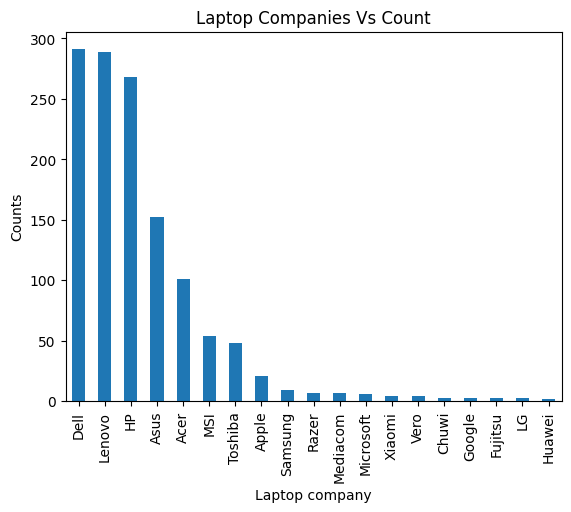

In [630]:
# Univariate Analysis
df['Company'].value_counts().plot(kind='bar')
plt.xlabel("Laptop company")
plt.ylabel('Counts')
plt.title("Laptop Companies Vs Count")
plt.show()

- For the Bivariate Analysis the Price column which we required is in the Euros we need to change this into the Indian Rs.

In [631]:
# we are taking the current euro price for the INR.
df['Price']=round(df['Price_euros']*87.91,2).astype('int')

# Hence the Price converted from Euros to INR.

In [632]:
# Hence we don't need the Price_euros column we can drop the column
# we have change the price from euros to Indian Rupees effectively.
df.drop(columns=['Price_euros'], inplace=True)

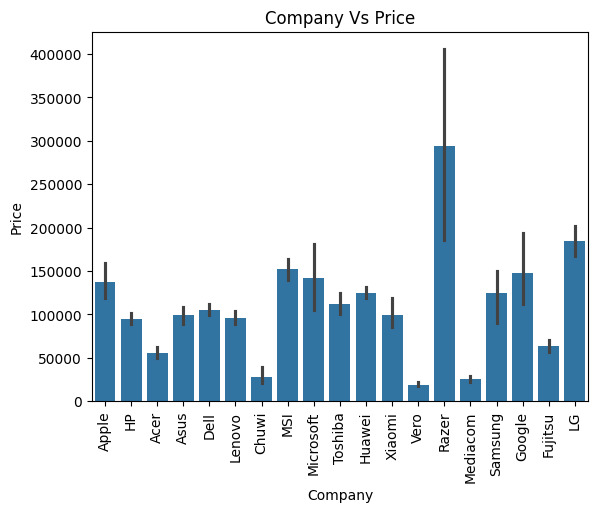

In [633]:
# Bivariate Analysis
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=90)
plt.title("Company Vs Price")
plt.show()

In [634]:
# We will focus on the other companies which are having the double digits laptop counts.
df=df[df.groupby('Company').Company.transform('count')>20].copy()
# copy() is for the dataframe conversion.
# we have grouped by the values which are greater than 20 from the count of the laptops.

In [635]:
df.shape

(1224, 12)

- Hence we have removed the 51 counts of companies which are having the less than 20 laptops.

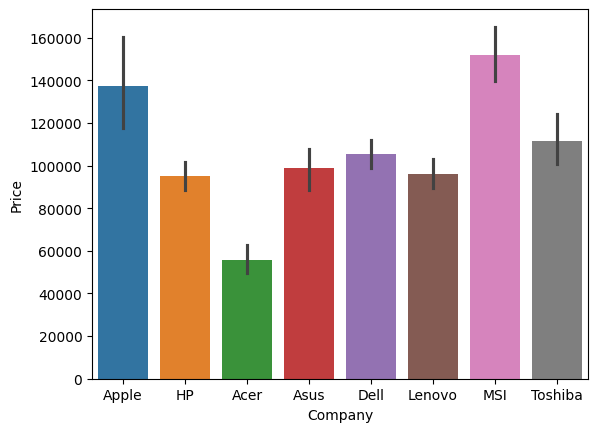

In [636]:
# Plotting after removing the companies
sns.barplot(x=df['Company'],y=df['Price'], hue=df['Company'])
plt.show()
# now the values which we get are evenly balancecd and spread out.

Now we will look at the 'Product' column

In [637]:
df['Product'].value_counts()

XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Legion Y520-15IKBN                     19
Vostro 3568                            19
                                       ..
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
Portege X30-D-10L                       1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Product, Length: 589, dtype: int64

- Here the categories are 589 which are very large number
- If there are more than 20 categories we can just delete the column as the 589 categories will make the complications.
- 20 would have been our limit

In [638]:
# dropping the Product column.
df.drop(columns=['Product'], inplace=True)

In [639]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
636,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23kg,164303
1088,HP,Notebook,13.3,Quad HD+ 3200x1800,Intel Pentium Dual Core 4405Y 1.5GHz,4GB,32GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.29kg,54064
509,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg,101008
795,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.42kg,204830


In [640]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                492
1366x768                                         258
IPS Panel Full HD 1920x1080                      217
IPS Panel Full HD / Touchscreen 1920x1080         48
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                8
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200                    4
1440x900                                      

- ScreenResolution gives the pixel size.
- we will make the 4 columns for our understanding - X_res,Y_res, Touchscreen, IPS panel.
- for understanding we will work on the 1 value

In [641]:
a= "IPS Panel 4K Ultra HD / Touchscreen 3840x2160"

In [642]:
# we will extract the 3840 and 2160 as the X_resolution and Y_resolution

a.split()

['IPS', 'Panel', '4K', 'Ultra', 'HD', '/', 'Touchscreen', '3840x2160']

In [643]:
a.split()[-1] # we are taking the last value

'3840x2160'

In [644]:
a.split()[-1].split('x') # want the splitting criteria to be x.

['3840', '2160']

In [645]:
a.split()[-1].split('x')[0] # for 0th position we will get the X_res

'3840'

In [646]:
a.split()[-1].split('x')[1] # for 1st position we will get Y_res.

'2160'

- we can apply this to the entire touchscreen column so that we can have the all values for x and y resolutions.
- for this we will use the lambda function.

In [647]:
print("X_resolution: ",(lambda a:a.split()[-1].split('x')[0])(a))
print("Y_resolution: ",(lambda a:a.split()[-1].split('x')[1])(a))

X_resolution:  3840
Y_resolution:  2160


In [648]:
df['X_res']=df['ScreenResolution'].apply((lambda a:a.split()[-1].split('x')[0])).astype('int')

In [649]:
# the datatype for the above is object, hence we need to convert the datatype to the integer.

In [650]:
# for the y_res
df['Y_res']=df['ScreenResolution'].apply((lambda a:a.split()[-1].split('x')[1])).astype('int')

In [651]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
1074,Lenovo,Ultrabook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,150632,1920,1080
574,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.05kg,60218,1920,1080
448,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,90348,1920,1080
968,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,276828,1920,1080
1110,HP,Notebook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core M 6Y54 1.1GHz,8GB,256GB SSD,Intel HD Graphics 515,Windows 10,1.16kg,149359,3200,1800


- The following code states that if there is "Touchscreen" in the value then 1 else it will show 0.

In [652]:
(lambda a: 1 if "Touchscreen" in a else 0)(a)

1

In [653]:
df['Tochscreen'] = df['ScreenResolution'].apply((lambda a: 1 if "Touchscreen" in a else 0))

- We can do it also for the IPS panel aslo.

In [654]:
df['IPS'] = df['ScreenResolution'].apply((lambda a: 1 if "IPS" in a else 0))

In [655]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS
1264,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,33317,1366,768,0,0
675,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.4kg,113755,1920,1080,0,0
150,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,109822,1920,1080,0,0
335,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,111469,1920,1080,0,0
1000,Acer,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.7kg,110766,1920,1080,0,1


- we have replaced the column 'ScreenResolution' column with 4 assorted columns
- now we don't need the 'ScreenResolution' column as we have assorted the required values from the column, hence we will drop the 'ScreenResolution' column.

In [656]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [657]:
df.sample(5) # hence we have no longer the 'ScreenResolution column'

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS
53,HP,Notebook,13.3,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49kg,96964,1920,1080,0,0
731,Dell,Notebook,15.6,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg,57053,1366,768,0,0
247,Asus,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,16GB,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.6kg,263642,1920,1080,0,0
875,Dell,Ultrabook,12.5,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,148567,1920,1080,0,0
723,Dell,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,321697,3840,2160,0,0


In [658]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     124
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
Intel Atom x5-Z8350 1.44GHz      1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 111, dtype: int64

- we can see that there are 111 categories under the 'CPU' column.
- we will try to reduce the categories.

In [659]:
a = "Intel Core i5 7200U 2.5GHz"

In [660]:
a.split()

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [661]:
" ".join(a.split()[0:3])
# we will split out the 3 words
# and join them back as the text.

'Intel Core i5'

- we will create the lambda function for the same.

In [662]:
(lambda a:" ".join(a.split()[0:3]))(a)

'Intel Core i5'

In [663]:
df['Cpu']=df['Cpu'].apply((lambda a:" ".join(a.split()[0:3])))

In [664]:
df['Cpu'].value_counts()

Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD A12-

- The categories has been reduced down significantly.
- but there are many categories still.
- we will split out all the AMD processors in the AMD category for the better split.

In [665]:
df['Cpu'].value_counts()

Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD A12-

-

In [666]:
b="AMD E-Series 9000"
b[4]

'E'

In [667]:
def fetch_processor_name(text):
  if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3" or text=="Intel Core M":
    return text
  elif text.split()[0]=="Intel":
    return " ".join(text.split()[0:2])
  else:
    if text[4]=='A':
      return "AMD A Series"
    elif text[4]=='E':
      return "AMD E Series"
    elif text[4]=='R':
      return "AMD Ryzen Series"
    elif text[4]=='F':
      return "AMD F Series"
    else:
      return "Other AMD Processors"

In [668]:
df['Cpu'].apply(fetch_processor_name)

0       Intel Core i5
1       Intel Core i5
2       Intel Core i5
3       Intel Core i7
4       Intel Core i5
            ...      
1270    Intel Core i7
1271    Intel Core i7
1272    Intel Celeron
1273    Intel Core i7
1274    Intel Celeron
Name: Cpu, Length: 1224, dtype: object

In [669]:
df['CPU']=df['Cpu'].apply(fetch_processor_name)

In [670]:
df['CPU'].value_counts()

Intel Core i7       493
Intel Core i5       411
Intel Core i3       134
Intel Celeron        71
AMD A Series         45
Intel Pentium        30
Intel Core M         16
AMD E Series          9
Intel Atom            5
AMD Ryzen Series      4
Intel Xeon            4
AMD F Series          2
Name: CPU, dtype: int64

- hence we have reduced down the categories from 36 to 12.
- we can drop the 'Cpu' column now

In [671]:
df.drop(columns=['Cpu'], inplace=True)

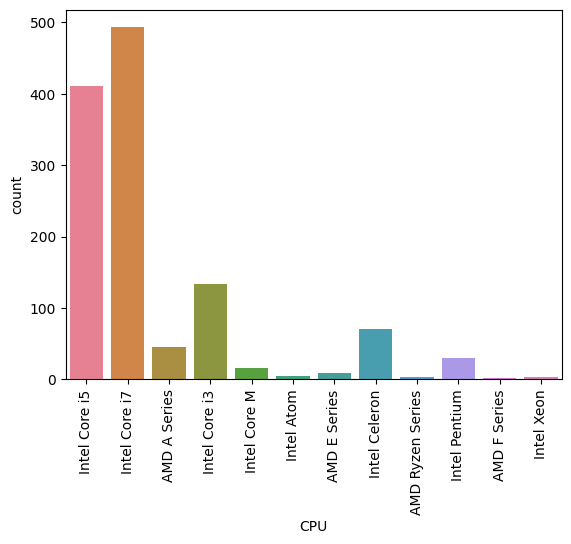

In [672]:
# Univariate analysis.
sns.countplot(x=df['CPU'], data=df, hue=df['CPU'])
plt.xticks(rotation=90)
plt.show()

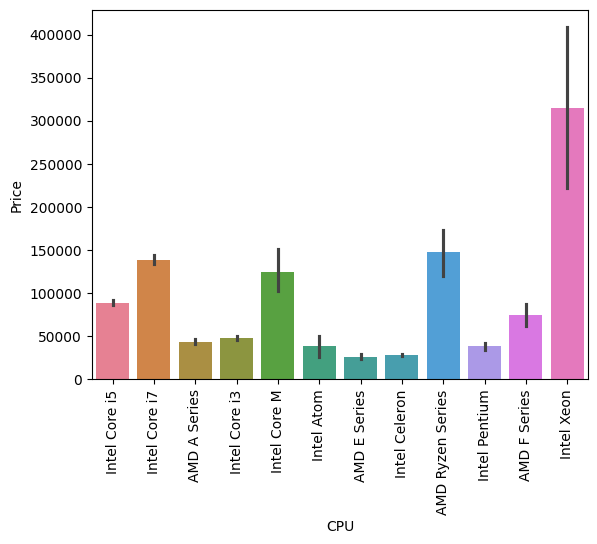

In [673]:
sns.barplot(x=df['CPU'], y=df['Price'], hue=df['CPU'])
plt.xticks(rotation=90)
plt.show()

- This gives the Interesting approach i.e. Intel Xeon is the costliest
- Then we have the Ryzen series followed by core M series, core i5, core i3, pentium, atom and celeron
- In AMD we have Ryzen, followed by F-series, A-series and at last E series.
- This is how price is varying with the processors.

In [674]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU
1271,Lenovo,2 in 1 Convertible,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,131777,3200,1800,1,1,Intel Core i7
844,HP,Ultrabook,14.0,8GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.54kg,164391,1920,1080,0,0,Intel Core i7
335,HP,Notebook,14.0,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,111469,1920,1080,0,0,Intel Core i5
615,Asus,Gaming,17.3,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,102678,1920,1080,0,0,Intel Core i7
592,Dell,2 in 1 Convertible,11.6,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,53009,1366,768,1,0,Intel Core M


- Now we will work on the 'Ram' column
- we will remove the GB from the Ram column and by changing the datatype for the same to int.

In [675]:
df['Ram']=df['Ram'].apply(lambda x:x.replace('GB',"")).astype('int')

In [676]:
df['Ram'].value_counts()

8     595
4     351
16    186
6      34
12     25
32     15
2      14
24      3
64      1
Name: Ram, dtype: int64

<Axes: >

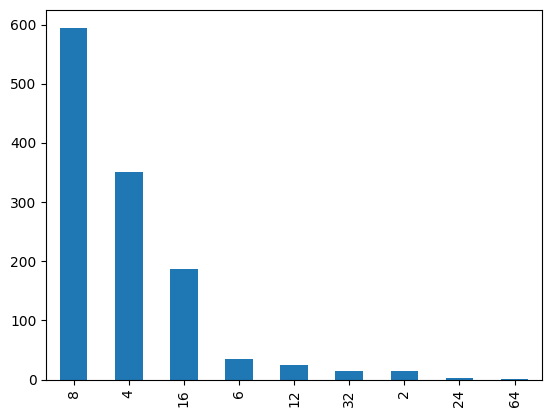

In [677]:
# Univariate analysis for ram column
df['Ram'].value_counts().plot(kind='bar')


<ipython-input-678-f0ddff08178c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Ram'], y=df['Price'], palette='bright')


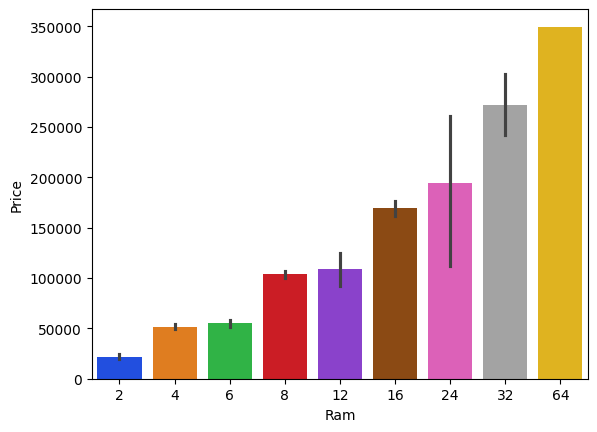

In [678]:
# Bivariate analysis

sns.barplot(x=df['Ram'], y=df['Price'], palette='bright')
plt.show()

- we can see that the ram column has the linear relationship with the price column.
- Increasing ram effects to the increasing price for the laptop
- So, the Ram and Price has the very healthy and positive correlation.

In [679]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU
120,Acer,Notebook,15.6,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.1kg,42108,1920,1080,1,1,Intel Core i3
819,Dell,Notebook,14.0,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76kg,66372,1366,768,0,0,Intel Core i5
1124,Asus,Notebook,15.6,4,1TB HDD,Intel HD Graphics 620,Windows 10,2kg,38240,1366,768,0,0,Intel Core i3
290,Acer,Notebook,15.6,2,16GB SSD,Intel HD Graphics,Chrome OS,2.19kg,17494,1366,768,0,0,Intel Celeron
840,Asus,Gaming,17.3,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,158150,1920,1080,0,0,Intel Core i7


In [680]:
df['Gpu'].value_counts()

Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 108, dtype: int64

- We will split the data into either Intel, Nvidia , and AMD

In [681]:
z='Intel HD Graphics 620'
z.split()[0]

'Intel'

In [682]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [683]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU
272,Dell,Notebook,15.6,8,256GB SSD,AMD,Linux,2.14kg,64620,1920,1080,0,0,Intel Core i7


In [684]:
df['Gpu'].value_counts()

Intel     666
Nvidia    385
AMD       173
Name: Gpu, dtype: int64

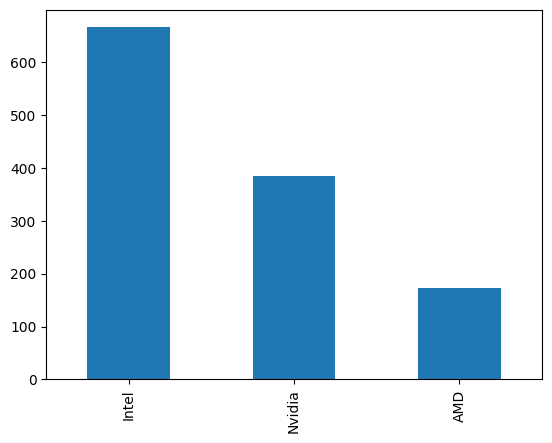

In [685]:
# Univariate Analysis
df['Gpu'].value_counts().plot(kind='bar')
plt.show()

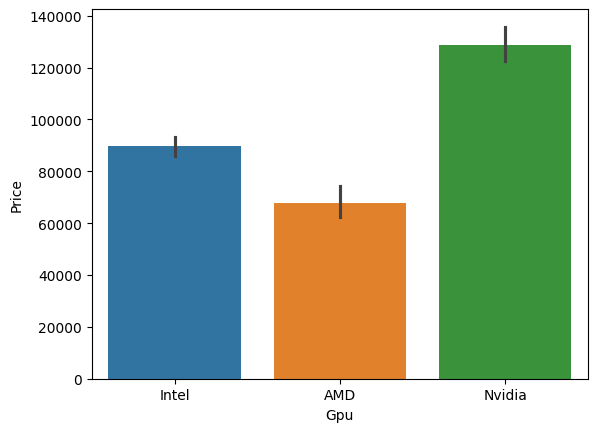

In [686]:
# Bivariate Analysis
sns.barplot(x=df['Gpu'], y=df['Price'] , hue=df['Gpu'])
plt.show()

- Our understanding from the visualization is Nvidia Gpu is very costly
- Then we have Intel followed by AMD Gpu.
- Generally NVIDIA processors are add on processors for the faster processing.

In [687]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU
240,Lenovo,Notebook,15.6,8,128GB SSD,Intel,Windows 10,2.2kg,51778,1366,768,0,0,Intel Core i3


In [688]:
df['OpSys'].value_counts()

Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Android            2
Windows 10 S       2
Name: OpSys, dtype: int64

- There aren't many categories but there is repeatability
- Windows 10 and Windows 10 S we will club them as one.
- Mac OS X and Mac OS we will combine them as one category.


In [689]:
def os(text):
  if text=="Windows 10" or text=="Windows 10 S":
    return "Windows 10"
  elif text=="Windows 7":
    return text
  elif text=="macOS" or text=="Mac OS X":
    return "Mac OS"
  elif text=="No OS":
    return text
  else:
    return "Linux/Android/Chrome OS"


In [690]:
df['OpSys']=df['OpSys'].apply(os)

In [691]:
df['OpSys'].value_counts()

Windows 10                 1013
Linux/Android/Chrome OS      82
No OS                        63
Windows 7                    45
Mac OS                       21
Name: OpSys, dtype: int64

- we have reduced down the categories here
- Let's plot this on the graph for univariate as well as bivariate analysis

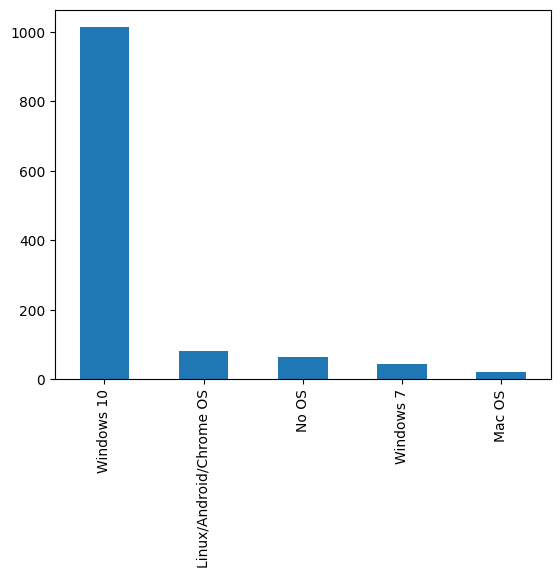

In [692]:
# Univariate analysis
df['OpSys'].value_counts().plot(kind='bar')
plt.show()

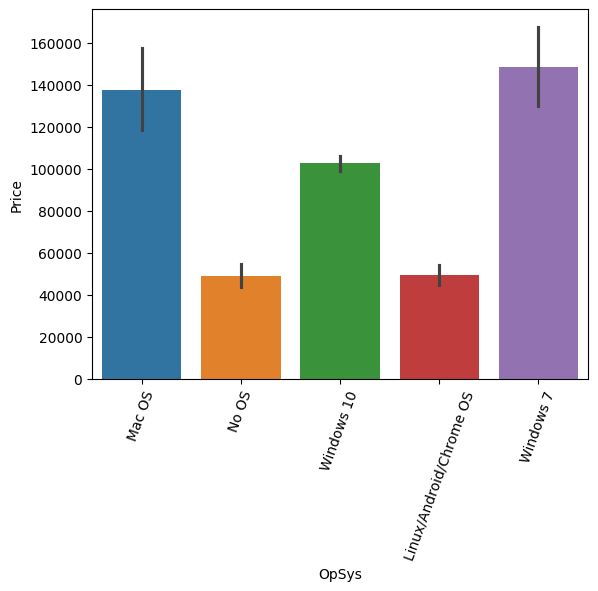

In [693]:
# Bivariate analysis
sns.barplot(x=df['OpSys'], y=df['Price'] , hue=df['OpSys'])
plt.xticks(rotation=70)
plt.show()

- we get the understanding here that the windows 7 is the costliest laptop
- one of the reason being it has the server based os and very sterdy systems followed by the Mac.
- When you have the Linux/Android/Chrome OS or No OS the price range will be on much low level.

In [694]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU
527,Lenovo,Notebook,15.6,8,2TB HDD,Nvidia,No OS,2.2kg,40350,1366,768,0,0,Intel Core i3


In [695]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1270     1.8kg
1271     1.3kg
1272     1.5kg
1273    2.19kg
1274     2.2kg
Name: Weight, Length: 1224, dtype: object

- we will remove the kg from the weight values for making it as a numerical value

In [696]:
df['Weight']=df['Weight'].apply(lambda x:x.replace('kg','')).astype('float')

In [697]:
df['Weight'].describe()

count    1224.000000
mean        2.063204
std         0.663863
min         0.690000
25%         1.597500
50%         2.060000
75%         2.320000
max         4.700000
Name: Weight, dtype: float64

- we understand that the heaviest laptop weighs around the 4.7kg
- The lightest laptop weighs around 0.69kg.
- we can understand from the displot that majority of the laptops are weighs between 1kg to 2.5kg.



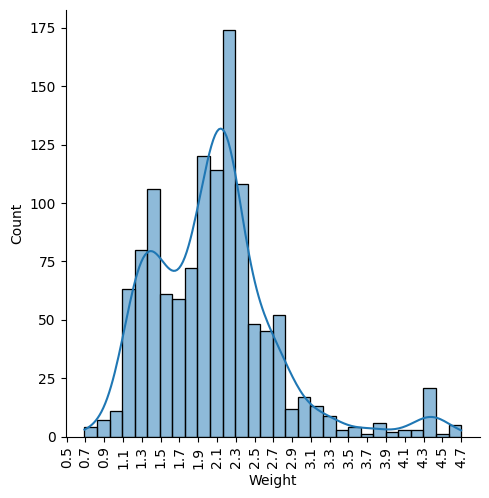

In [698]:
sns.displot(df['Weight'], kde=True)
plt.xticks(np.arange(0.5,4.9,0.2), rotation=90)
plt.show()

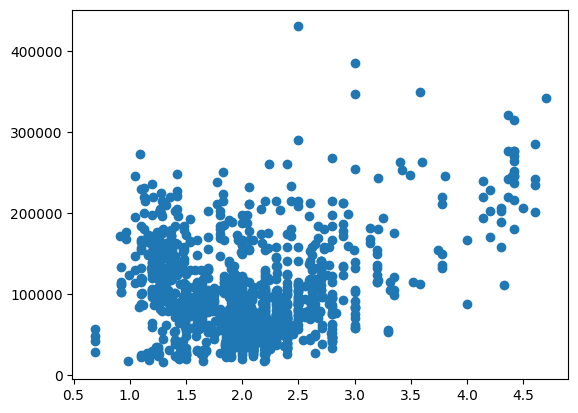

In [699]:
plt.scatter(x=df['Weight'], y=df['Price'])
plt.show()

In [700]:
df['Memory'].value_counts()

256GB SSD                        393
1TB HDD                          214
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
5

- We have the lots of categories of the memory values
- 1. SSD - Solid state Drive.
- 2. HDD - Hard Disk Drives.
- 3. Hybrid - combination of SSD and HDD.
- 4. Flash Storage

- Apart from this we could have the combinations of these like it could be SSD + Hybrid, flash storage + Hybrid.



- We will make the columns HDD, SSD, Hybrid, Flash Storage
- and we will store the values of these.

In [701]:
# we will convert the TB into the GB (1TB= 1000GB approx.)
# 128GB + 1TB into 128 + 1000

In [702]:
df['Memory'].astype(str).replace("\.0","", regex=True)
# want to replace . followed by 0 with nothing
# for that we will use the regex function.

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1270              128GB SSD
1271              512GB SSD
1272     64GB Flash Storage
1273                1TB HDD
1274              500GB HDD
Name: Memory, Length: 1224, dtype: object

In [703]:
df['Memory']=df['Memory'].apply(lambda x:x.replace('TB','000'))
df['Memory']=df['Memory'].apply(lambda x:x.replace('GB',''))

In [704]:
df['Memory'].value_counts()

256 SSD                         393
1000 HDD                        214
500 HDD                         124
512 SSD                         105
128 SSD +  1000 HDD              93
256 SSD +  1000 HDD              73
128 SSD                          71
32 Flash Storage                 29
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         12
64 Flash Storage                 10
256 SSD +  2000 HDD              10
256 Flash Storage                 8
1.0000 Hybrid                     7
16 Flash Storage                  6
180 SSD                           5
128 Flash Storage                 4
16 SSD                            3
512 SSD +  2000 HDD               3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
32 SSD                            2
256 SSD +  256 SSD                2
512 SSD +  512 SSD                1
512 SSD +  256 SSD          

In [705]:
new=df['Memory'].str.split('+',n=1,expand=True)
# we will split by the criteria having the +
# n=1 means we need just one split where there should be one split for one +
# expand=True we convert it into the
# wherever there is value after + there will be the value else None.
# and at last we have store it in new dataframe

In [706]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None
1273,1000 HDD,None


In [707]:
df['first']=new[0]
df['first'].str.strip() # to eliminate the trailing and leading spaces from the string.

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1270              128 SSD
1271              512 SSD
1272     64 Flash Storage
1273             1000 HDD
1274              500 HDD
Name: first, Length: 1224, dtype: object

In [708]:
df['second']=new[1]

In [709]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU,first,second
62,Lenovo,Notebook,14.0,8,256 SSD,Intel,No OS,1.70,52658,1920,1080,0,1,Intel Core i3,256 SSD,None
217,HP,Notebook,14.0,8,256 SSD,Nvidia,Windows 10,1.63,90635,1920,1080,0,0,Intel Core i7,256 SSD,None
254,Acer,Notebook,17.3,4,256 SSD,Nvidia,Windows 10,3.00,61712,1920,1080,0,1,Intel Core i3,256 SSD,None
742,Toshiba,Notebook,14.0,8,256 SSD,Intel,Windows 10,1.25,134941,1920,1080,1,1,Intel Core i5,256 SSD,None
240,Lenovo,Notebook,15.6,8,128 SSD,Intel,Windows 10,2.20,51778,1366,768,0,0,Intel Core i3,128 SSD,None


In [710]:
# now we will create the 4 new columns for layer 1 before + (first)to change the data numerical form like 0 and 1.
# and 4 new columns for the second column.
df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)


In [711]:
df['first']=df['first'].str.replace(r'\D','', regex=True)
# we use the regex to remove the text from the column
# \D means anything which in text.

In [712]:
df.sample(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
24,HP,Ultrabook,15.6,8,256 SSD,Intel,Windows 10,1.91,57932,1920,1080,0,0,Intel Core i7,256,None,0,1,0,0
306,HP,2 in 1 Convertible,13.3,16,256 SSD,Intel,Windows 10,1.28,173622,1920,1080,1,0,Intel Core i7,256,None,0,1,0,0


In [713]:
df['second'].fillna('0', inplace=True) # we will replace the none with the 0

In [714]:
df.sample(4)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
592,Dell,2 in 1 Convertible,11.6,4,128 SSD,Intel,Windows 10,1.39,53009,1366,768,1,0,Intel Core M,128,0,0,1,0,0
1270,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel,Windows 10,1.80,56086,1920,1080,1,1,Intel Core i7,128,0,0,1,0,0
395,HP,Ultrabook,15.6,4,256 SSD,AMD,Windows 10,1.91,43867,1920,1080,0,0,AMD A Series,256,0,0,1,0,0
39,HP,Notebook,15.6,8,256 SSD,Nvidia,Windows 10,2.10,77272,1920,1080,0,0,Intel Core i5,256,0,0,1,0,0


In [715]:
df['second'].str.strip() # to eliminate the trailing and leading spaces from the string.

0       0
1       0
2       0
3       0
4       0
       ..
1270    0
1271    0
1272    0
1273    0
1274    0
Name: second, Length: 1224, dtype: object

In [716]:
# we will do the same step for the second layer as well

df['Layer2HDD']=df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['second']=df['second'].str.replace(r'\D','', regex=True)

In [717]:
df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

In [718]:
df.sample(3)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
381,Lenovo,Notebook,15.6,4,128 SSD,Intel,No OS,1.85,35471,1920,...,128,0,0,1,0,0,0,0,0,0
691,Lenovo,Notebook,14.0,4,256 SSD,Intel,Windows 10,1.70,61449,1920,...,256,0,0,1,0,0,0,0,0,0
282,Lenovo,Gaming,15.6,8,256 SSD,Nvidia,Windows 10,2.50,72877,1920,...,256,0,0,1,0,0,0,0,0,0


In [719]:
#first 	second 	Layer1HDD 	Layer1SSD 	Layer1Hybrid 	Layer1Flash_Storage 	Layer2HDD 	Layer2SSD 	Layer2Hybrid 	Layer2Flash_Storage
# 128 	1000 	      0 	         1 	         0 	              0 	              1 	        0            	0              	0
# this indiactes
# 128GB SSD and 1000GB(1TB) HDD likewise we have converted the categorical columns into the numerical columns.

- now we will shrink the 8 columns into to
- by multiplying the layer 1 to the first and layer2 to the second


In [720]:
df['HDD']=df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD']
df['SSD']=df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD']
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid']
df['Flash_Storage']=df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage']

In [721]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel,Mac OS,1.37,117772,2560,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel,Mac OS,1.34,79025,1440,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel,No OS,1.86,50548,1920,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD,Mac OS,1.83,223067,2880,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel,Mac OS,1.37,158554,2560,...,0,0,0,0,0,0,0,256,0,0


In [722]:
# now we can remove the supportive columns that we made to reach the last four columns

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'], inplace=True)

In [723]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU,HDD,SSD,Hybrid,Flash_Storage
887,Asus,Gaming,17.3,12,128 SSD + 1000 HDD,Nvidia,Windows 10,2.2,120427,1920,1080,0,0,Intel Core i5,1000,128,0,0


- We will see the relation of these columns with respect to the price column
- Correlation or dependence is any statistical relationship, whether casual or not, between two random variables or bivariate data.

In [724]:
df.corr(numeric_only=True)['Price']

Inches           0.055330
Ram              0.726639
Weight           0.212038
Price            1.000000
X_res            0.553707
Y_res            0.552964
Tochscreen       0.161443
IPS              0.289226
HDD             -0.091752
SSD              0.654751
Hybrid           0.026676
Flash_Storage   -0.023384
Name: Price, dtype: float64

- we will see the correlation of the numerical columns with respect to price
- Ram has very high impact i.e. 72.66% on price.
- SSD has the 65% of correlation with the price.
- Hybrid and flash storage has the least impact on the price.(we can simply remove them).


Text(0.5, 1.0, 'Correlation between columns')

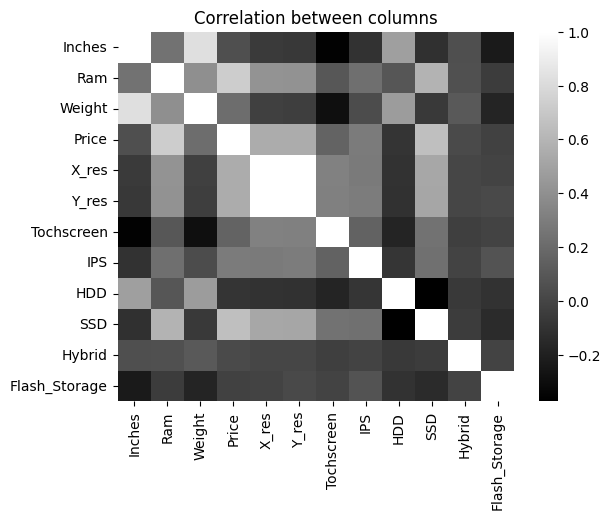

In [725]:
sns.heatmap(df.corr(numeric_only=True), cmap='gray')
plt.title('Correlation between columns')

- Inches have very high correlation with the weight i.e. 82% this means as weight increases the inches also increases.
- Wherever the Ram is more the price is higher
- SSD with respect to price

In [726]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)


In [727]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU,HDD,SSD
0,Apple,Ultrabook,13.3,8,128 SSD,Intel,Mac OS,1.37,117772,2560,1600,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel,Mac OS,1.34,79025,1440,900,0,0,Intel Core i5,0,0
2,HP,Notebook,15.6,8,256 SSD,Intel,No OS,1.86,50548,1920,1080,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,512 SSD,AMD,Mac OS,1.83,223067,2880,1800,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,256 SSD,Intel,Mac OS,1.37,158554,2560,1600,0,1,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel,Windows 10,1.80,56086,1920,1080,1,1,Intel Core i7,0,128
1271,Lenovo,2 in 1 Convertible,13.3,16,512 SSD,Intel,Windows 10,1.30,131777,3200,1800,1,1,Intel Core i7,0,512
1272,Lenovo,Notebook,14.0,2,64 Flash Storage,Intel,Windows 10,1.50,20131,1366,768,0,0,Intel Celeron,0,0
1273,HP,Notebook,15.6,6,1000 HDD,AMD,Windows 10,2.19,67163,1366,768,0,0,Intel Core i7,1000,0


In [728]:
df['HDD'].value_counts()

0        667
1000     397
500      126
2000      32
128        1
10000      1
Name: HDD, dtype: int64

<Axes: >

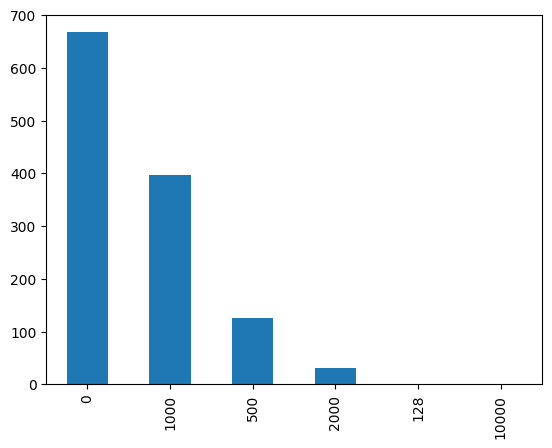

In [729]:
df['HDD'].value_counts().plot(kind='bar')

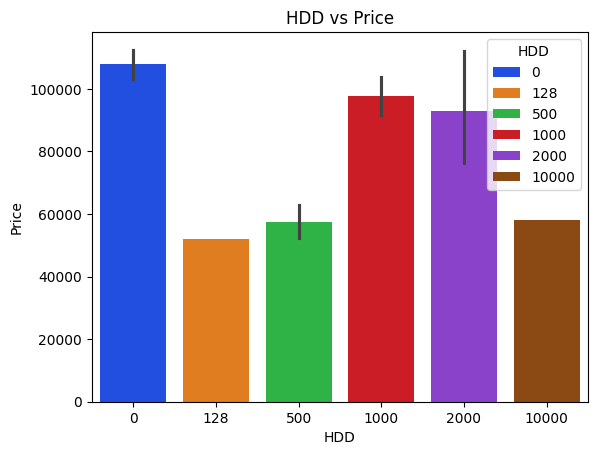

In [730]:
sns.barplot(x=df['HDD'], y=df['Price'], hue=df['HDD'], palette='bright')
plt.title('HDD vs Price')
plt.show()

- The ideal scenario here is if the laptop has no HDD then it will be of SSD

In [731]:
df['SSD'].value_counts()

256     479
0       425
128     166
512     125
1000     14
180       5
16        3
32        2
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

<Axes: >

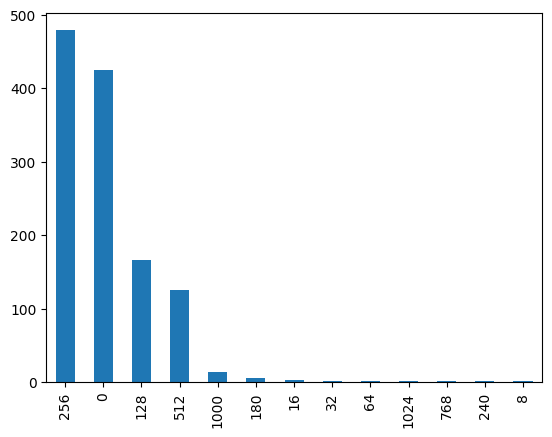

In [732]:
df['SSD'].value_counts().plot(kind='bar')

<ipython-input-733-1f318bbb14e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['SSD'], y=df['Price'], palette='bright')


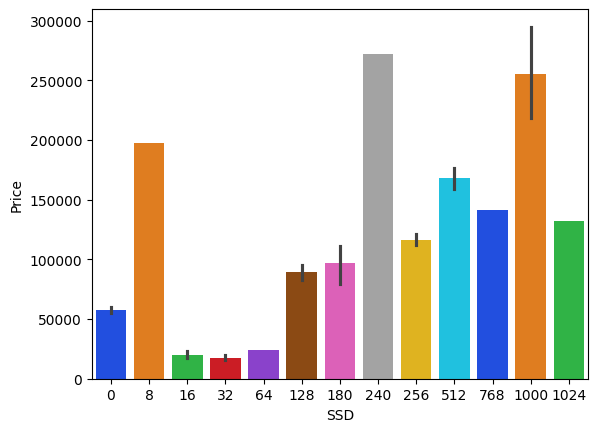

In [733]:
sns.barplot(x=df['SSD'], y=df['Price'], palette='bright')
plt.show()

- we can see the steadier increase of the graph when we eliminate the laptops having 1 count.
- Excluding those values we can say that SSD is in the linear relationship with the laptop price.

In [734]:
df.corr(numeric_only=True)['Price']

Inches        0.055330
Ram           0.726639
Weight        0.212038
Price         1.000000
X_res         0.553707
Y_res         0.552964
Tochscreen    0.161443
IPS           0.289226
HDD          -0.091752
SSD           0.654751
Name: Price, dtype: float64

- we will reduce the x and y resolution into one particular column.
- x_res : no. of pixels placed on the screen horizontally.
- y_res : no. of pixels placed on the screen vertically.
- ppi : (Pixel Density)
- square root of x_res^2 + y_res^2/ screen size

In [735]:
df['PPI'] = ((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']
df['PPI'] = round(df['PPI'],2)

In [736]:
df.sample(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Tochscreen,IPS,CPU,HDD,SSD,PPI
1256,Asus,Gaming,17.3,16,128 SSD + 1000 HDD,Nvidia,Windows 10,4.00,167029,1920,1080,0,1,Intel Core i7,1000,128,127.34
179,HP,2 in 1 Convertible,13.3,8,256 SSD,Intel,Windows 10,1.29,131777,3840,2160,1,1,Intel Core i5,0,256,331.26


In [737]:
df.corr(numeric_only=True)['Price']

Inches        0.055330
Ram           0.726639
Weight        0.212038
Price         1.000000
X_res         0.553707
Y_res         0.552964
Tochscreen    0.161443
IPS           0.289226
HDD          -0.091752
SSD           0.654751
PPI           0.483787
Name: Price, dtype: float64

- now we can remove the inches, x_res, and y_res columns

In [738]:
df.drop(columns=['X_res', 'Y_res', 'Inches'], inplace=True)

In [739]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Tochscreen,IPS,CPU,HDD,SSD,PPI
288,Lenovo,Gaming,16,256 SSD + 1000 HDD,Nvidia,Windows 10,2.5,103645,0,1,Intel Core i7,1000,256,141.21
37,Dell,Notebook,8,128 SSD + 1000 HDD,AMD,Windows 10,2.8,86063,0,1,Intel Core i5,1000,128,127.34
433,Lenovo,Workstation,16,512 SSD,Nvidia,Windows 10,2.3,214939,0,1,Intel Core i7,0,512,282.42


In [740]:
df['Tochscreen'].value_counts()

0    1055
1     169
Name: Tochscreen, dtype: int64

<Axes: >

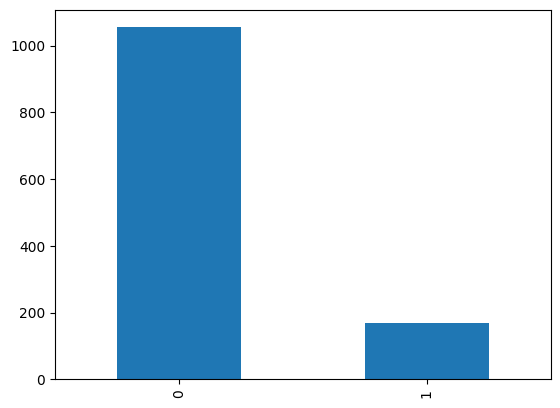

In [741]:
df['Tochscreen'].value_counts().plot(kind='bar')

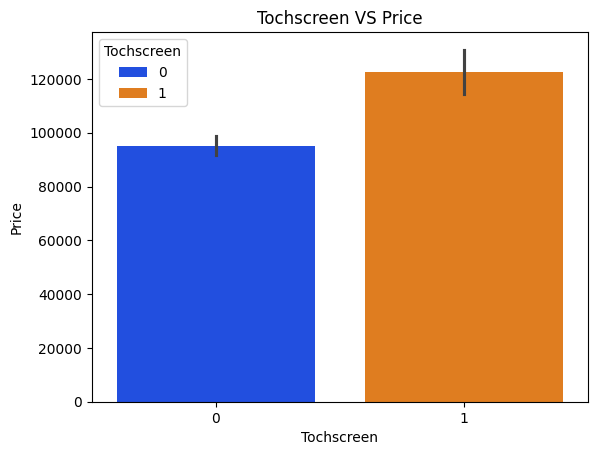

In [742]:
sns.barplot(x=df['Tochscreen'], y=df['Price'] , hue=df['Tochscreen'], palette='bright')
plt.title('Tochscreen VS Price')
plt.show()

In [743]:
df['IPS'].value_counts()

0    885
1    339
Name: IPS, dtype: int64

<Axes: >

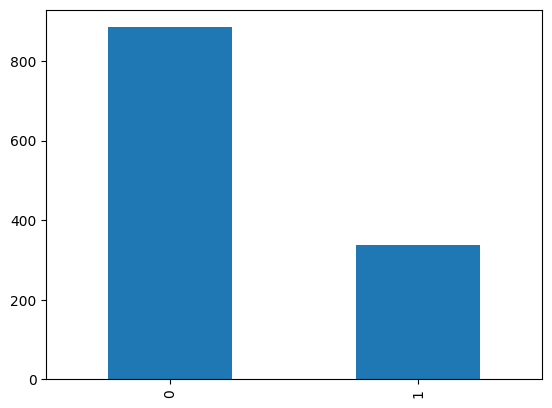

In [744]:
df['IPS'].value_counts().plot(kind='bar')

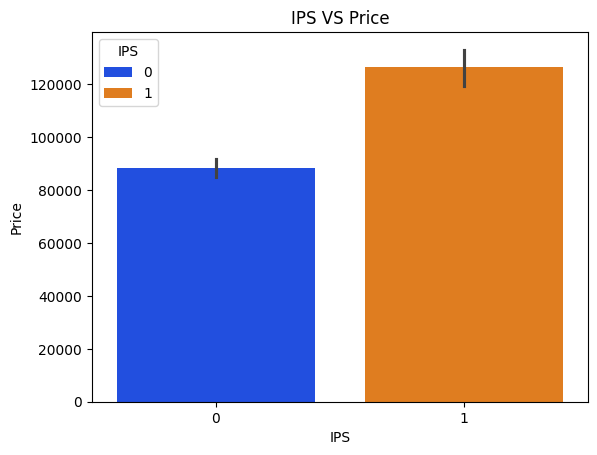

In [745]:
sns.barplot(x=df['IPS'], y=df['Price'] , hue=df['IPS'], palette='bright')
plt.title('IPS VS Price')
plt.show()

- we can conclude that the Tochscreen laptops  has more price range than the laptops without tochscreens.
- we can also see that the IPS laptops costs more than the non-IPS laptops

In [746]:
df['PPI'].value_counts()

141.21    419
100.45    195
127.34    131
157.35    122
165.63    100
111.94     42
135.09     28
176.23     25
276.05     25
282.42     23
106.11     22
209.80     18
125.37      9
117.83      8
331.26      7
226.98      6
226.42      6
254.67      5
127.68      4
224.17      4
158.48      4
220.53      4
169.78      2
220.84      2
316.97      2
352.47      2
90.58       2
119.72      1
189.91      1
107.99      1
111.14      1
194.95      1
234.98      1
146.86      1
Name: PPI, dtype: int64

- there are few common resolutions and also the few of them are unique.

In [747]:
df['PPI'].describe()

count    1224.000000
mean      145.675874
std        42.045198
min        90.580000
25%       127.340000
50%       141.210000
75%       157.350000
max       352.470000
Name: PPI, dtype: float64

- we have the mean resolution of 145.67
- we have min resolution of 90.58
- and having the maximum resolution with the 352.47

In [748]:
df[df['PPI']==352.47]# costliest laptops

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Tochscreen,IPS,CPU,HDD,SSD,PPI
146,HP,Ultrabook,8,512 SSD,Intel,Windows 10,0.97,177050,1,1,Intel Core M,0,512,352.47
911,HP,Ultrabook,8,240 SSD,Intel,Windows 10,1.09,272521,1,0,Intel Core M,0,240,352.47


In [749]:
df[df['PPI']==90.58]# lowest priced laptops

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Tochscreen,IPS,CPU,HDD,SSD,PPI
49,Asus,Notebook,4,1000 HDD,Nvidia,Windows 10,2.8,40966,0,0,Intel Pentium,1000,0,90.58
766,Asus,Notebook,4,1000 HDD,Nvidia,Windows 10,2.8,41347,0,0,Intel Pentium,1000,0,90.58


In [750]:
highppi_laptops = df[df['PPI']>300]
# we have separated the dataframe with the laptops having the PPI more than 300.
# for future purpose

In [751]:
highppi_laptops

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Tochscreen,IPS,CPU,HDD,SSD,PPI
146,HP,Ultrabook,8,512 SSD,Intel,Windows 10,0.97,177050,1,1,Intel Core M,0,512,352.47
179,HP,2 in 1 Convertible,8,256 SSD,Intel,Windows 10,1.29,131777,1,1,Intel Core i5,0,256,331.26
182,Lenovo,2 in 1 Convertible,16,512 SSD,Intel,Windows 10,1.40,162545,1,1,Intel Core i7,0,512,316.97
207,Dell,Ultrabook,8,256 SSD,Intel,Windows 10,1.21,171336,1,1,Intel Core i7,0,256,331.26
311,Dell,Ultrabook,16,1000 SSD,Intel,Windows 10,1.21,219687,1,1,Intel Core i7,0,1000,331.26
316,HP,2 in 1 Convertible,16,1000 SSD,Intel,Windows 10,1.29,215291,1,1,Intel Core i7,0,1000,331.26
343,Lenovo,2 in 1 Convertible,16,512 SSD,Intel,Windows 10,1.40,184523,1,1,Intel Core i7,0,512,316.97
470,HP,2 in 1 Convertible,8,512 SSD,Intel,Windows 10,1.29,175732,1,1,Intel Core i7,0,512,331.26
565,Dell,Ultrabook,8,128 SSD,Intel,Windows 10,1.21,140568,1,1,Intel Core i5,0,128,331.26
911,HP,Ultrabook,8,240 SSD,Intel,Windows 10,1.09,272521,1,0,Intel Core M,0,240,352.47


Text(0.5, 1.0, 'Distplot for PPI')

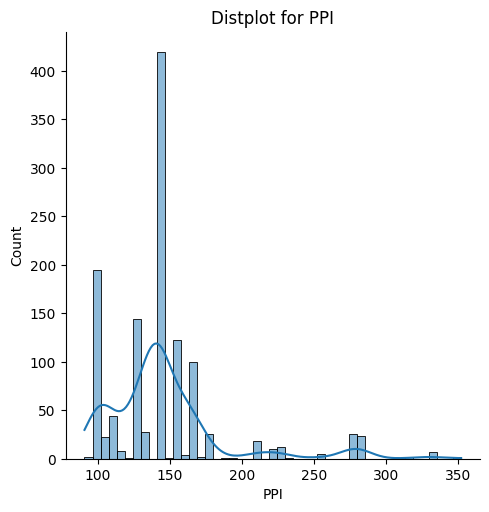

In [752]:
sns.displot(x=df['PPI'],kde=True)
plt.title('Distplot for PPI')

- majority of laptops are between the 120 to 180.


Text(0.5, 1.0, 'Scatterplot PPI vs Price')

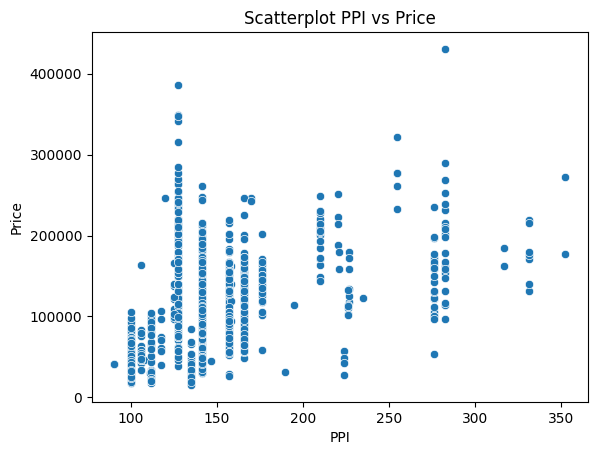

In [753]:
sns.scatterplot(x=df['PPI'], y=df['Price'])
plt.title('Scatterplot PPI vs Price')

Text(0.5, 1.0, 'Price Analysis')

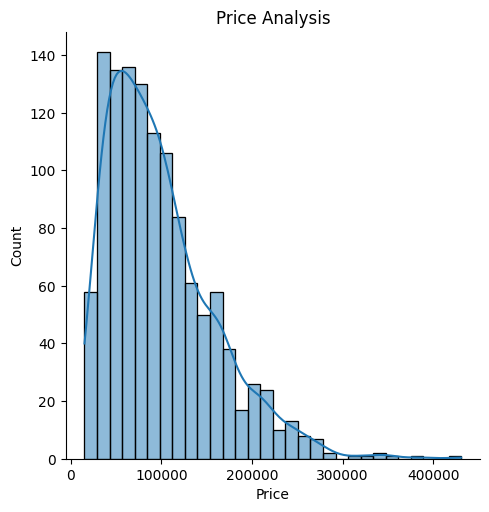

In [754]:
sns.displot(x=df['Price'], kde=True)
plt.title('Price Analysis')

- we can see that the price has not been the normally distributed.
- It has the huge skewness on the right side.
- hence the data is not distributed normally.
- we have to make the data normal.


Text(0.5, 1.0, 'Price Normalization')

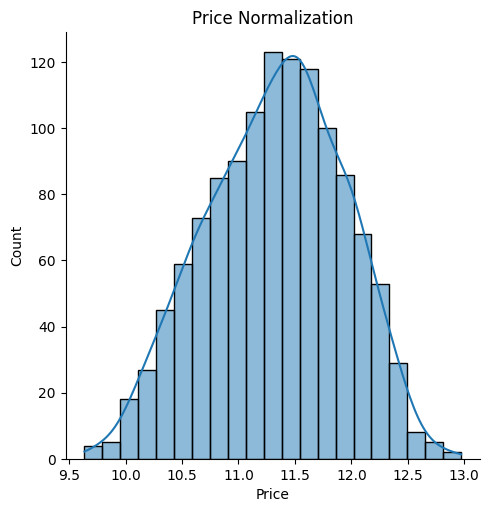

In [755]:
sns.displot(x=np.log(df['Price']), kde=True)
plt.title("Price Normalization")

- This curve looks much normal than the previous
- the skewness is getting distributed.
- we will consider this particular thing with respect to the Price column.

In [756]:
df.drop(columns=['Memory'], inplace=True)
# we will remove the memory column as we have the HDD and SSD columns

In [757]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Tochscreen,IPS,CPU,HDD,SSD,PPI
247,Asus,Gaming,16,Nvidia,Windows 10,3.60,263642,0,0,Intel Core i7,0,256,127.34
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,117772,0,1,Intel Core i5,0,128,226.98
741,Dell,Notebook,8,Intel,Windows 10,2.00,58460,0,0,Intel Core i3,0,256,100.45


Now we will split the dataset into the X and y for the inputs and the outputs
- X for the input values exclude the price
- y with the Price column with log values

In [758]:
X = df.drop(columns=['Price'])
y= np.log(df['Price']) # log values for the normalization

**We will split the data into training and testing**
- for the ML model building


In [759]:
from sklearn.model_selection import train_test_split

In [760]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15, random_state=42)

In [761]:
X.shape

(1224, 12)

In [762]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (1040, 12)
Shape of X_test: (184, 12)
Shape of y_train: (1040,)
Shape of y_test: (184,)


- Column Trasnformer : Applies transformers to columns of an array or Pandas Dataframe.
- Allows different columns or column subsets of the input to be transformed and the feature generated by each transformer will be concatenated to form a single feature space.

In [763]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

- We will import the linear Regression

In [764]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

- We will import the KNN Regressor

In [773]:
from sklearn.neighbors import KNeighborsRegressor

- We will import the Decision Tree Regressor

In [766]:
from sklearn.tree import DecisionTreeRegressor

- We will take 5 more algorithms


In [767]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

- Among these 10 algorithms we will take the algorithms with best metrics score and ignore the rests.



- We have used the feature encoding method
from the Ordinal encoding and OneHotEncoding

- We dont have the ordered data hence we will use the OneHotEncoding. Which will give the equal preference for the encoding.

- we will use the column Transformer for doing the encoding on the multiple columns at a time else we have to repeate the step for 5 times for the 5 different columns.

- Pipeline is used to combine the multiple steps together. If we have 2 or more than 2 steps combined together we will use the Pipeline.

In [768]:
X_train.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Tochscreen,IPS,CPU,HDD,SSD,PPI
797,Dell,Notebook,8,Intel,Windows 10,1.95,0,0,Intel Core i5,0,128,100.45


**Linear Regression**

In [769]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
# we will indicate the index number on which columns we will apply the transformer
# we will passthrough the remaining columns other than the columns which we are gonna transform.
#sparse_output=False - # gives us the specific access about space utilization. i.e. remove the 0's in the encoded values.
# we are eliminating the 0's for making the algorithm efficient and saving the space.
#drop='first' # to drop the one of the column for multicolinearity to be avoided hence we decided first column will be dropped.
# Hence every particular column has the unique value.
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),('step2',step2)])
# here step1 containing the columntransformer and step2 contains the linearregression model
# we are pipelining the step 1 and step 2 in the one pipe.
pipe.fit(X_train,y_train)
# we are using the training data for model fitting.
# first it will tranform and then it will apply the linear regression model on the training data through the pipeline.

y_pred = pipe.predict(X_test)
# for the prediction of the values on the test dataset.
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

**Lasso Regression**

In [771]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = Lasso(alpha=0.0001) # hyperparameter tunning
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.8126
MAE for Linear Regression model: 0.1957
MSE for Linear Regression Model: 0.0592


**Ridge Regression**

In [772]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = Ridge(alpha=0.01) # hyperparameter tunning
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.8122
MAE for Linear Regression model: 0.1963
MSE for Linear Regression Model: 0.0593


**KNeighborsRegressor**

In [774]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = KNeighborsRegressor()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.763
MAE for Linear Regression model: 0.1999
MSE for Linear Regression Model: 0.0748


**Decision Tree Regressor**

In [777]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 =DecisionTreeRegressor(max_depth=8) # maximum depth of the tree splits
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.8258
MAE for Linear Regression model: 0.1777
MSE for Linear Regression Model: 0.055


**Support Vector Regressor**

In [780]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = SVR(C=100000)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.7659
MAE for Linear Regression model: 0.1882
MSE for Linear Regression Model: 0.0739


**ADAboost Regressor**

In [781]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = AdaBoostRegressor()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.7961
MAE for Linear Regression model: 0.2002
MSE for Linear Regression Model: 0.0644


**Random Forest Regressor**

In [805]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=500) # 500 times the algorithm will run
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.8766
MAE for Linear Regression model: 0.1528
MSE for Linear Regression Model: 0.039


**XGBoost Regressor**

In [796]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = XGBRegressor()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.8684
MAE for Linear Regression model: 0.1504
MSE for Linear Regression Model: 0.0416


**Gradient Boosting Regressor**

In [797]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,1,3,4,8])
    ], remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500) # n_estimators is like 500 times the algorithm will keep running
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 Score for Linear Regression model:",round(r2_score(y_test, y_pred),4))
print("MAE for Linear Regression model:",round(mean_absolute_error(y_test, y_pred),4))
print("MSE for Linear Regression Model:",round(mean_squared_error(y_test, y_pred),4))

R2 Score for Linear Regression model: 0.8772
MAE for Linear Regression model: 0.1475
MSE for Linear Regression Model: 0.0388


In [807]:
# we will export our dataframe and model into the .pkl files by using pickle
import pickle
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [809]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [822]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

df=pickle.load(open('df.pkl','rb'))
pipe=pickle.load(open('pipe.pkl','rb'))

st.title("Laptop Price Predictor")
company = st.selectbox("Brand",df['Company'].unique(), index=4)
type = st.selectbox("Laptop Type",df['TypeName'].unique() , index=1)
ram = st.selectbox("Ram in GB",[2,4,6,8,12,16,24,32,64,128], index=3)
gpu = st.selectbox("GPU", df['Gpu'].unique(), index=0)
os = st.selectbox("Operating System" ,df['OpSys'].unique() , index=2)
weight = st.slider("Weight of the Laptop in Kg.",min_value=0.65,max_value=5.0,value=2.0,step=0.5)
touchscreen = st.selectbox("Touchscreen", ['Yes','No'] , index=1)
ips = st.selectbox("IPS Display",['Yes','No'] , index=0)
cpu = st.selectbox("Processor", df['CPU'].unique(), index=0)
hdd = st.selectbox("Hard Drive in GB(Select the 0 for only SSD in system)", [0,128,256,512,1024,2048], index=0)
ssd = st.selectbox("SSD size in GB", [0,8,16,32,64,128,180,240,256,512,768,1024,2048] , index=9)
screen_size = st.slider("Screen size (in inches.)",min_value=10.5,max_value=18.5,value=15.6,step=0.1)
resolution = st.selectbox("Screen Resolution",
["2560x1600","1440x900","1920x1080","2880x1800","1366x768","2304x140","3200x1800","1920x1200","2256x1504",
"3840x2160","2160x1440","2560x1440","1600x900","2736x1824","2400x1600"], index=2)

if st.button("PREDICT PRICE"):
    ppi=None
    if(touchscreen=="Yes"):
        touchscreen=1
    else:
        touchscreen=0
    if(ips=="Yes"):
        ips=1
    else:
        ips=0
    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi =((X_res**2)+(Y_res**2)**0.5)/screen_size
    query=np.array([[company,type,ram,gpu,os,weight,touchscreen,ips,cpu,hdd,ssd,ppi]])
    op=np.exp(pipe.predict(query))
    st.subheader("The Predicted price of the laptop with the above configuration is ₹"+str(round(op[0])))

Overwriting app.py


In [815]:
df.sample(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Tochscreen,IPS,CPU,HDD,SSD,PPI
1242,Acer,Notebook,4,Intel,Linux/Android/Chrome OS,2.4,31805,0,0,Intel Core i3,500,0,100.45
62,Lenovo,Notebook,8,Intel,No OS,1.7,52658,0,1,Intel Core i3,0,256,157.35


In [824]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session fb4be839034a50f


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.88.94:8501

npx: installed 22 in 3.619s
your url is: https://every-radios-enter.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
  Stopping...
^C


**Hence we have created the Basic Application for the Prediction of the Laptop Prices.**